In [3]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.5 MB/s eta 0:00:00


In [1]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 13.0 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import optuna
from optuna import Trial, visualization
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

In [7]:
data = pd.read_csv('/content/data.csv')


In [8]:
data.isna().any()

,0
match id,False
team1,False
team1_id,False
team1_roster_ids,False
team2,False
...,...
team_ratio_bat_form,False
team_ratio_bowl_form,False
team_ratio_last5_avg,False
team_ratio_last5_eco_top,False


In [9]:
data=data.fillna(0)
# filling data with 0 will not hv a larger effect \
# as while developing features for players for which data is not available has been ignored

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 98 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match id                   948 non-null    int64  
 1   team1                      948 non-null    int64  
 2   team1_id                   948 non-null    int64  
 3   team1_roster_ids           948 non-null    object 
 4   team2                      948 non-null    int64  
 5   team2_id                   948 non-null    int64  
 6   team2_roster_ids           948 non-null    object 
 7   winner                     948 non-null    int64  
 8   winner_id                  948 non-null    int64  
 9   toss winner                948 non-null    int64  
 10  toss decision              948 non-null    int64  
 11  venue                      948 non-null    int64  
 12  city                       948 non-null    int64  
 13  match_dt                   948 non-null    object 

In [11]:
features = [
    'match id', 'team1',  'team2', 'toss winner', 'toss decision', 'venue', 'city',  'lighting',
    'series_name', 'season', 'ground_id', 'team_count_50runs_last15', 'team_winp_last5',
    'team1only_avg_runs_last15', 'team1_winp_team2_last15', 'ground_avg_runs_last15', 'year', 'month',
    'day', 'team1_top4_avg', 'team2_top4_avg', 'team1_top4_bats', 'team2_top4_bats', 'team1_top4_eco',
    'team2_top4_eco', 'team1_bot4_eco', 'team2_bot4_eco', 'team1_top2_wck', 'team2_top2_wck',
    'team1_avg_top4_ag', 'team2_avg_top4_ag', 'team1_eco_bot4_ag', 'team2_eco_bot4_ag', 'team1_eco_top4_ag',
    'team2_eco_top4_ag', 'team1_wck_top2_ag', 'team2_wck_top2_ag', 'team1_avg_top4_ve', 'team2_avg_top4_ve',
    'team1_eco_top4_ve', 'team2_eco_top4_ve', 'team1_eco_bot4_ve', 'team2_eco_bot4_ve', 'team1_wck_top2_ve',
    'team2_wck_top2_ve', 'team1_count_rel_bats', 'team2_count_rel_bats', 'team1_count_rel_bowl',
    'team2_count_rel_bowl', 'team1_avg_top4_in', 'team2_avg_top4_in', 'team1_eco_top4_in',
    'team2_eco_top4_in', 'team1_eco_bot4_in', 'team2_eco_bot4_in', 'team1_wck_top2_in', 'team2_wck_top2_in',
    'team1_count_bat_form', 'team2_count_bat_form', 'team1_last5_avg', 'team2_last5_avg',
    'team1_last5_eco_top', 'team2_last5_eco_top', 'team1_last5_eco_bot', 'team2_last5_eco_bot',
    'team1_count_bowl_form', 'team2_count_bowl_form', 'team_ratio_avg', 'team_ratio_bats',
    'team_ratio_eco_top', 'team_ratio_eco_bot', 'team_ratio_wck', 'team_ratio_avg_ag', 'team_ratio_avg_ve',
    'team_ratio_avg_in', 'team_ratio_eco_top_ag', 'team_ratio_eco_top_ve', 'team_ratio_eco_top_in',
    'team_ratio_eco_bot_ag', 'team_ratio_eco_bot_ve', 'team_ratio_eco_bot_in', 'team_ratio_wck_top_ag',
    'team_ratio_wck_top_ve', 'team_ratio_wck_top_in', 'team_ratio_rel_bats', 'team_ratio_rel_bowl',
    'team_ratio_bat_form', 'team_ratio_bowl_form', 'team_ratio_last5_avg', 'team_ratio_last5_eco_top',
    'team_ratio_last5_eco_bot'
]


In [12]:
y=data['winner']
x=data[features]

For k=1, GBM mean cross-validated accuracy: 0.677181843497633
For k=2, GBM mean cross-validated accuracy: 0.7173210804789752
For k=3, GBM mean cross-validated accuracy: 0.7373712057922585
For k=4, GBM mean cross-validated accuracy: 0.7542522974101921
For k=5, GBM mean cross-validated accuracy: 0.7489724310776943
For k=6, GBM mean cross-validated accuracy: 0.7499916457811195
For k=7, GBM mean cross-validated accuracy: 0.7489390142021721
For k=8, GBM mean cross-validated accuracy: 0.7468281815650236
For k=9, GBM mean cross-validated accuracy: 0.7679086605402394
For k=10, GBM mean cross-validated accuracy: 0.771077694235589
For k=11, GBM mean cross-validated accuracy: 0.7668783068783067
For k=12, GBM mean cross-validated accuracy: 0.7584572542467279
For k=13, GBM mean cross-validated accuracy: 0.7689891395154553
For k=14, GBM mean cross-validated accuracy: 0.7879587858535226
For k=15, GBM mean cross-validated accuracy: 0.7763742690058479
For k=16, GBM mean cross-validated accuracy: 0.7879

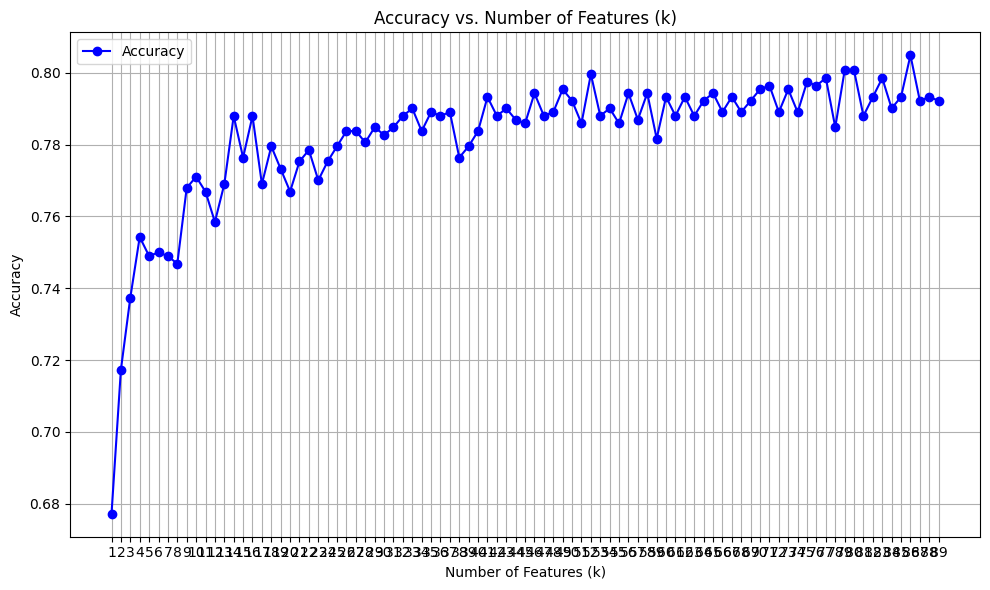

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import StratifiedKFold



# Assuming X and y are your features and target variable before splitting

k_values = range(1, 90)  # Start from 1 up to 25

# Store accuracy scores for different k values
accuracy_scores = []

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for k in k_values:
    # Store scores for the current k
    cv_scores = []

    for train_index, val_index in cv.split(x, y):
        X_train, X_val = x.iloc[train_index], x.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Fit SelectKBest with mutual_info_regression and k
        sel_k_cols = SelectKBest(mutual_info_regression, k=k)
        sel_k_cols.fit(X_train, y_train)
        mask = sel_k_cols.get_support()

        # Update X_train and X_val to only contain the selected features
        X_train_selected = X_train.loc[:, mask]
        X_val_selected = X_val.loc[:, mask]

        # Train GBM
        gbm = GradientBoostingClassifier(random_state=0)
        gbm.fit(X_train_selected, y_train)

        # Predict on validation set
        y_pred_gbm = gbm.predict(X_val_selected)

        # Calculate accuracy and store it
        accuracy = accuracy_score(y_val, y_pred_gbm)
        cv_scores.append(accuracy)

    # Store the mean accuracy for the current k
    mean_accuracy = np.mean(cv_scores)
    accuracy_scores.append(mean_accuracy)
    print(f'For k={k}, GBM mean cross-validated accuracy: {mean_accuracy}')

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Accuracy vs. Number of Features (k)')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# highest: For k=57, GBM mean cross-validated accuracy: 0.8017098301308827

In [14]:
from sklearn.feature_selection import SelectKBest

sel_k_cols = SelectKBest(mutual_info_regression, k=57)
sel_k_cols.fit(x, y)
mask = sel_k_cols.get_support()

# Update X_train to only contain the selected features
x_selected = x.loc[:, mask]
# X_train_selected

# If you also want to transform the test set, use the same mask

In [15]:
gbm = GradientBoostingClassifier()
scores = cross_val_score(gbm, x_selected, y, cv=5, scoring='accuracy')

In [16]:
scores.mean()
# 0.8070119743803954

np.float64(0.7932832080200501)

In [ ]:
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4],
    'max_depth': [3, 5, 7, 9, 11, 13],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': [0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(estimator=gbm, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(x_selected, y)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(random_search.best_score_))

In [ ]:
import optuna
from optuna import Trial, visualization
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

def objective(trial: Trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.4, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 50),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 50),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0)
    }

    gbm = GradientBoostingClassifier(**param)

    # Using cross-validation to get the average accuracy score
    accuracy = cross_val_score(gbm, x_selected, y, cv=5, scoring='accuracy').mean()

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
